# Introduction
This notebook plots a seasonal time series of one farm as example

# 0. Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# 1. Input

In [2]:
# Set paths
path = os.getcwd()
path_hab = os.path.join(path, "00_database", "db.csv")
path_out_fig = os.path.join(path, "00_figures")

# Set year
year = 2019

# Set regions
regions_list = ["Arendal"]

# Variable names for plotting
dict_names = {
    "A. sp.": "$\it{Alexandrium}$ spp.",
    "A. tamarense": "$\it{A. tamarense}$",
    "D. acuta": "$\it{D. acuta}$",
    "D. acuminata": "$\it{D.acuminata}$",
    "D. norvegica": "$\it{D. norvegica}$",
    "Pn. sp.": "$\it{Pseudo-nitzschia}$ spp.",
    "P. reticulatum": "$\it{P. reticulatum}$",
    "A. spinosum": "$\it{A. spinosum}$",
    "sst": "SST (°C)",
    "mld": "MLD (m)",
    "par": "PAR (E m$^{-2}$ d$^{-1}$)",
    "sss": "SSS (PSU)"
}


# 2. Read data

In [3]:
# Read CSV
db_df = pd.read_csv(path_hab, index_col=0)
db_df.index = pd.to_datetime(db_df.index)

# Subset for the region to plot
db_df = db_df[db_df['Region'].isin(regions_list)]

# Create week columns
db_df["Week"] = db_df.index.isocalendar().week.astype(int)

# Subset year
db_df = db_df[db_df.index.year == year]

In [4]:
db_df.head(3)

,A. sp.,A. tamarense,D. acuta,D. acuminata,D. norvegica,Pn. sp.,P. reticulatum,A. spinosum,sst,par,mld,sss,Region,Week
Date,,,,,,,,,,,,,,
2019-02-25,0,0,0,0,0,0.0,0,0.0,4.108474,9.528235,8.487862,31.836594,Arendal,9
2019-03-04,0,0,0,0,0,744.0,0,0.0,4.523050,12.719535,8.487862,31.859356,Arendal,10
2019-03-11,0,0,0,600,60,160.0,0,0.0,4.041139,11.388930,8.658787,30.711840,Arendal,11


# 3. Plot time series

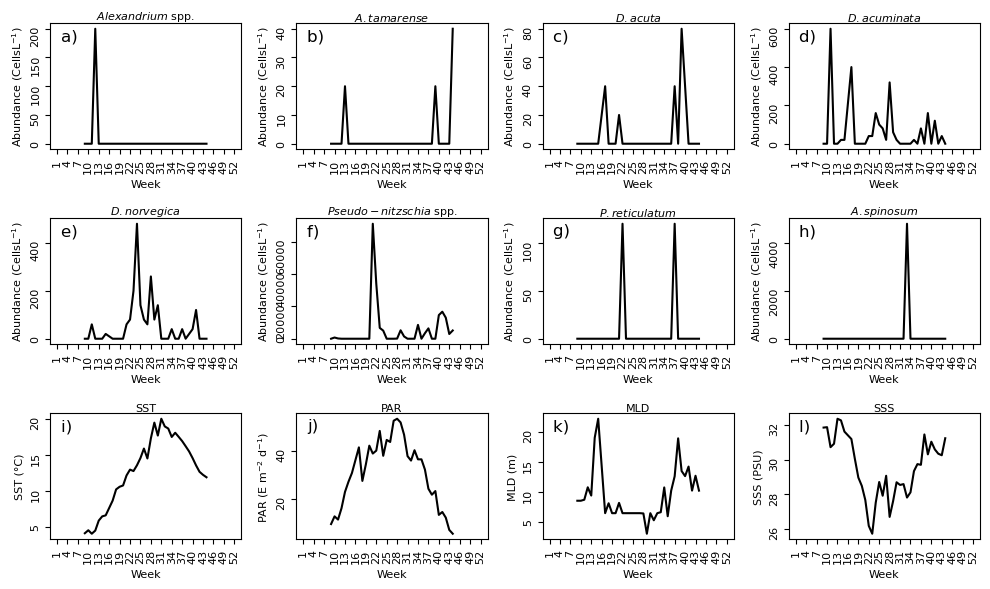

In [5]:
# Create figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(10, 6))

# Algae abundance
reg = "Arendal"

for i, (taxa, ax) in enumerate(zip(db_df.columns[:8], axes.flatten())):
    sns.lineplot(x="Week", y=taxa, data=db_df, color="k", ax=ax)
    ax.set_title(dict_names[taxa], fontsize=8, pad=-1)
    ax.tick_params(rotation=90, labelsize=8, axis="both")
    ax.set_xlim((-1, 54))
    ax.set_xticks(np.arange(1, 54, 3))
    ax.set_ylabel("Abundance (CellsL$^{-1}$)", fontsize=8)
    ax.set_xlabel("Week", fontsize=8)
    ax.text(2, ((db_df[taxa].max()-db_df[taxa].min())*0.9)+db_df[taxa].min(), f"{chr(ord('`') + i + 1)}) ", fontsize=12)

# Physical environment
for j, var in enumerate(db_df.columns[8:12], i + 1):
    sns.lineplot(x="Week", y=var, data=db_df, color="k", ax=axes.flatten()[j])
    axes.flatten()[j].set_title(dict_names[var].split(" ")[0], fontsize=8, pad=-1)
    axes.flatten()[j].tick_params(rotation=90, labelsize=8, axis="both")
    axes.flatten()[j].set_xlim((-1, 54))
    axes.flatten()[j].set_xticks(np.arange(1, 54, 3))
    axes.flatten()[j].set_ylabel(dict_names[var], fontsize=8)
    axes.flatten()[j].set_xlabel("Week", fontsize=8)
    axes.flatten()[j].text(2, ((db_df[var].max()-db_df[var].min())*0.9)+db_df[var].min(), f"{chr(ord('`') + j + 1)}) ", fontsize=12)

plt.tight_layout()
fig.savefig(os.path.join(path_out_fig, "input_sample.png"), dpi=300)
